In [23]:
import pickle
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
time, core = 60, 8
with open('{0}s{1}core.pickle'.format(time, core), 'rb') as f:
    history = pickle.load(f)
history.keys()

dict_keys(['net_rewards_by_generation', 'moving_average_rewards_by_generation', 'generation_mean_reward', 'generation_times'])

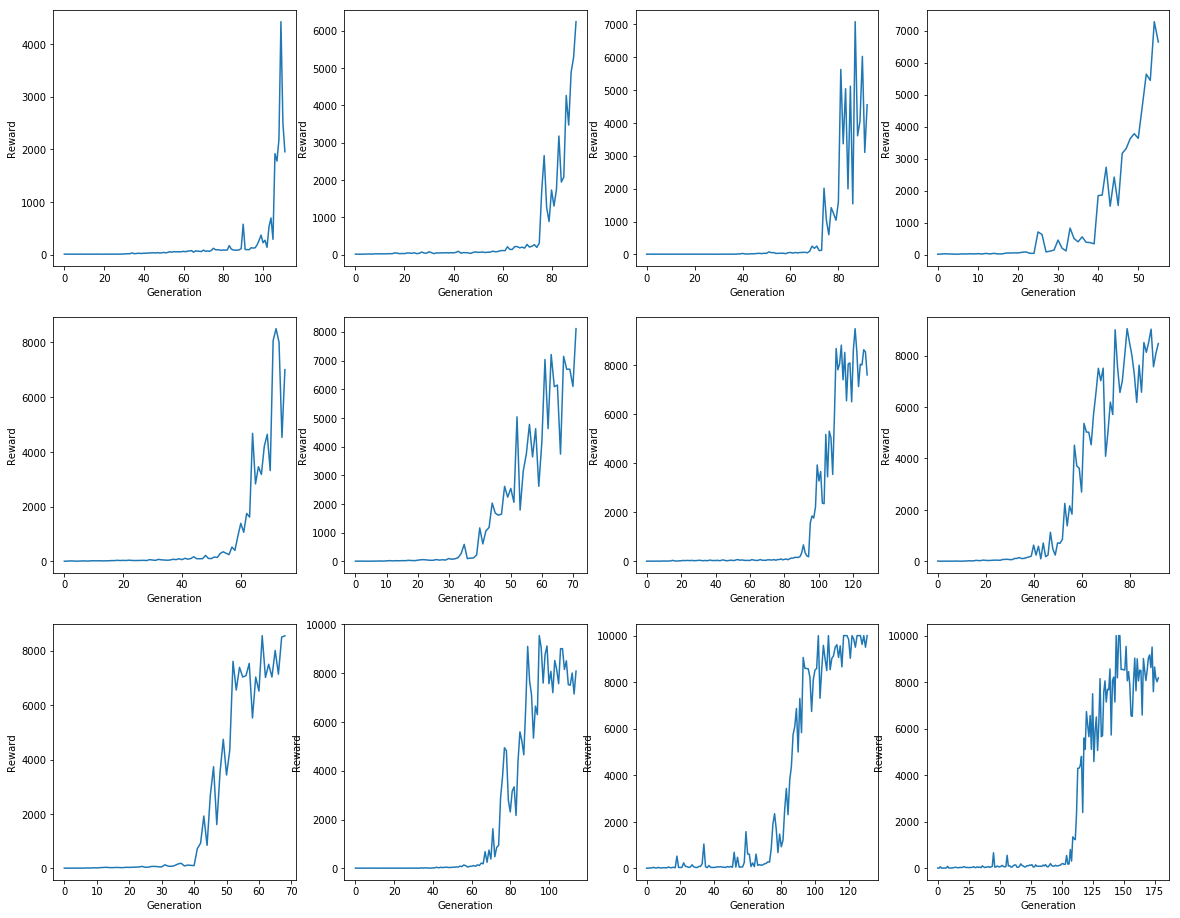

In [25]:
plt.figure(figsize=(20,16))
cores = [1,2,4,8]
times = [10,30,60]
for i, time in enumerate(times):
    for j, core in enumerate(cores):
        plt.subplot(3, 4, i*4 + j+1)
        with open('{0}s{1}core.pickle'.format(time, core), 'rb') as f:
            history = pickle.load(f)
        plt.plot(history['generation_mean_reward'])
        plt.xlabel('Generation')
        plt.ylabel('Reward')

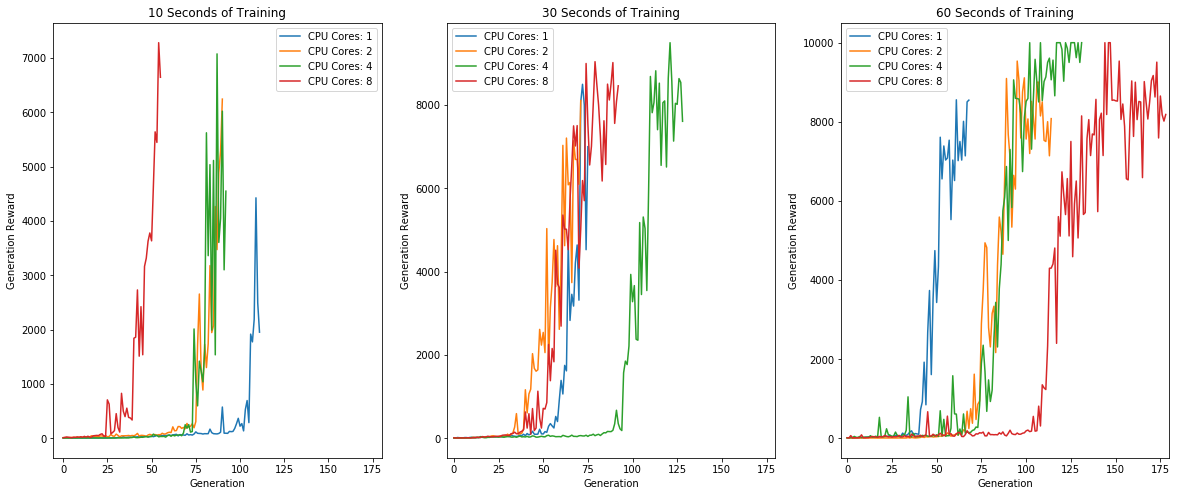

In [26]:
plt.figure(figsize=(20,8))
cores = [1,2,4,8]
times = [10,30,60]
for i, time in enumerate(times):
    for j, core in enumerate(cores):
        plt.subplot(1, 3, i+1)
        with open('{0}s{1}core.pickle'.format(time, core), 'rb') as f:
            history = pickle.load(f)
        plt.title("{} Seconds of Training".format(time))
        plt.plot(history['generation_mean_reward'], label="CPU Cores: {}".format(core), linewidth=1.5)
        plt.xlabel('Generation')
        plt.xlim(xmax=180)
        plt.ylabel('Generation Reward')
        plt.legend()

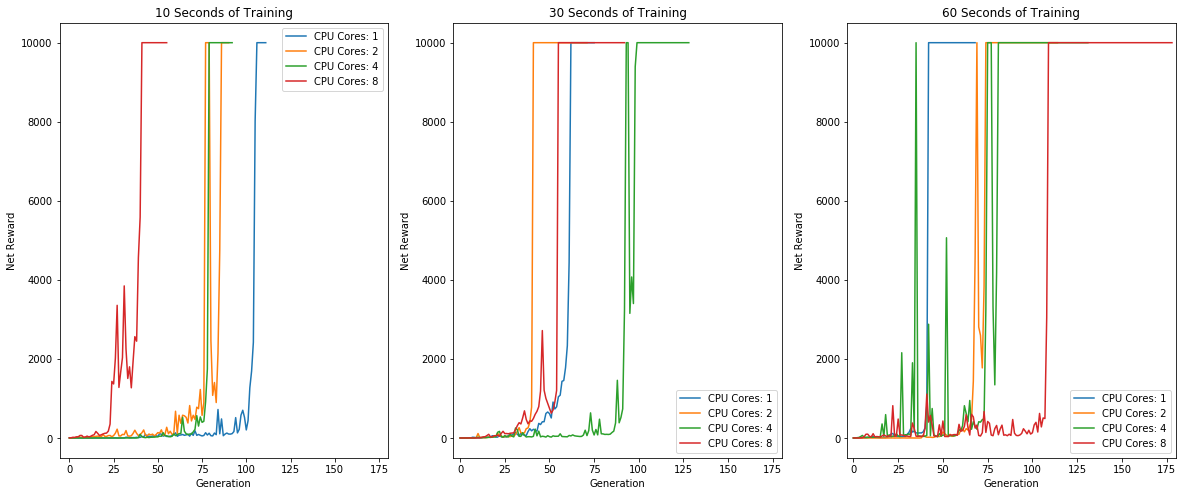

In [27]:
plt.figure(figsize=(20,8))
cores = [1,2,4,8]
times = [10,30,60]
for i, time in enumerate(times):
    for j, core in enumerate(cores):
        plt.subplot(1, 3, i+1)
        with open('{0}s{1}core.pickle'.format(time, core), 'rb') as f:
            history = pickle.load(f)
        plt.title("{} Seconds of Training".format(time))
        plt.plot(history['net_rewards_by_generation'], label="CPU Cores: {}".format(core), linewidth=1.5)
        plt.xlabel('Generation')
        plt.xlim(xmax=180)
        plt.ylabel('Net Reward')
        plt.legend()

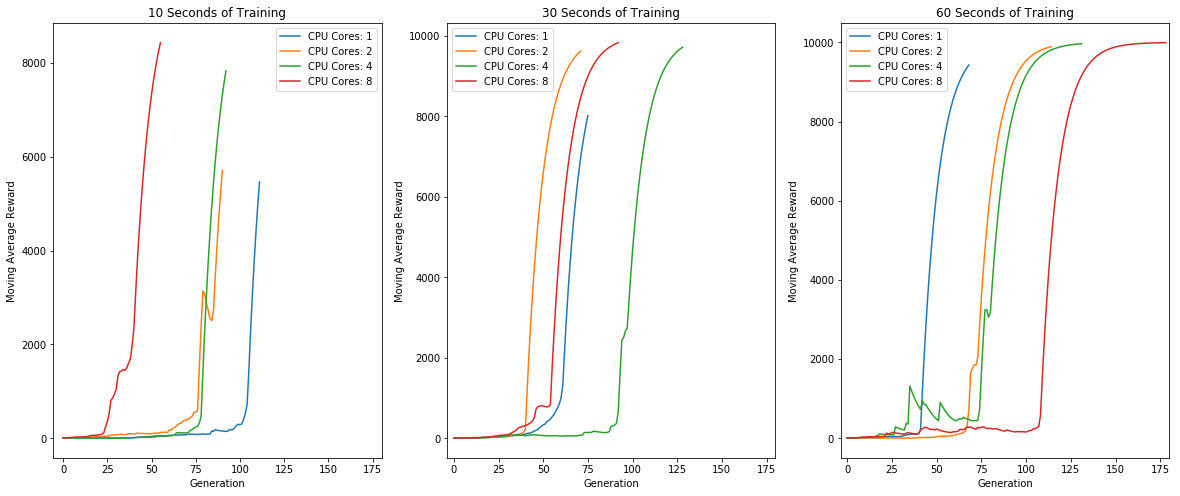

In [28]:
plt.figure(figsize=(20,8))
cores = [1,2,4,8]
times = [10,30,60]
for i, time in enumerate(times):
    for j, core in enumerate(cores):
        plt.subplot(1, 3, i+1)
        with open('{0}s{1}core.pickle'.format(time, core), 'rb') as f:
            history = pickle.load(f)
        plt.title("{} Seconds of Training".format(time))
        plt.plot(history['moving_average_rewards_by_generation'], label="CPU Cores: {}".format(core), linewidth=1.5)
        plt.xlabel('Generation')
        plt.xlim(xmax=180)
        plt.ylabel('Moving Average Reward')
        plt.legend()

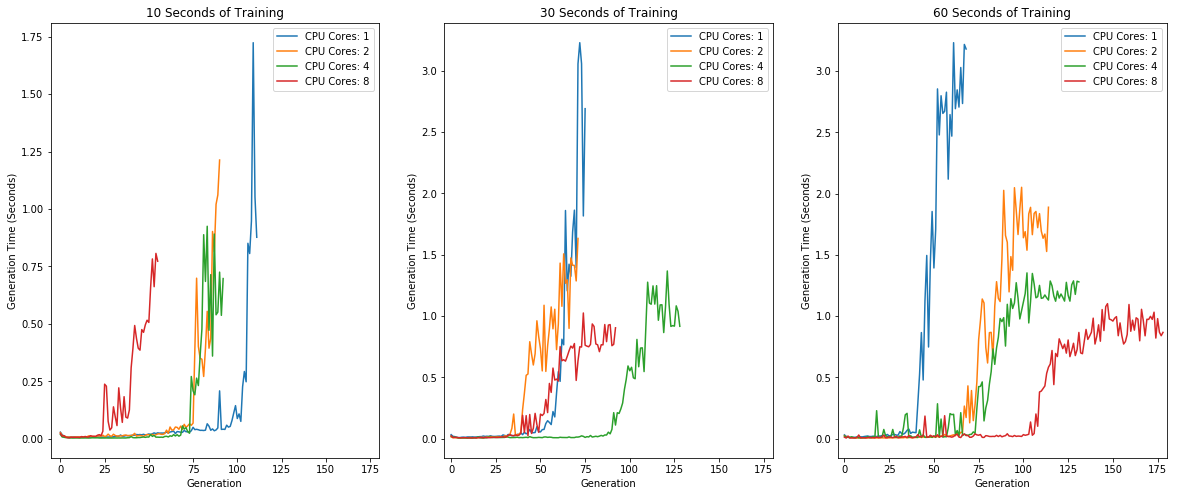

In [30]:
plt.figure(figsize=(20,8))
cores = [1,2,4,8]
times = [10,30,60]
for i, time in enumerate(times):
    for j, core in enumerate(cores):
        plt.subplot(1, 3, i+1)
        with open('{0}s{1}core.pickle'.format(time, core), 'rb') as f:
            history = pickle.load(f)
        plt.title("{} Seconds of Training".format(time))
        plt.plot(history['generation_times'], label="CPU Cores: {}".format(core), linewidth=1.5)
        plt.xlabel('Generation')
        plt.xlim(xmax=180)
        plt.ylabel('Generation Time (Seconds)')
        plt.legend()

In [36]:
import pandas as pd
rl_cpu_power = pd.read_csv('power_results/cpu.csv')
rl_gpu_power = pd.read_csv('power_results/gpu.csv')
es_power = pd.read_csv('power_results/EScpu.csv')
data = {
    'ES': es_power,
    'RL_CPU': rl_cpu_power,
    'RL_GPU': rl_gpu_power,
}

In [32]:
rl_cpu_power

,threads,training,cpuUsage,watt,A
0,1,10,13.0,62.5,0.550
1,2,10,13.8,62.8,0.558
2,4,10,15.8,62.8,0.558
3,8,10,17.6,63.5,0.566
4,1,30,12.6,62.0,0.552
5,2,30,14.0,62.3,0.558
6,4,30,16.0,63.4,0.565
7,8,30,18.6,64.0,0.570
8,1,30,12.7,62.0,0.551
9,2,60,14.3,62.4,0.557


In [ ]:
plt.figure(figsize=(20,8))
cores = [1,2,4,8]
algos = ['ES', 'RL_CPU', 'RL_GPU']
metrics = ['cpuUsage', 'watt', 'A']
for i, metric in enumerate(metrics):
    for j, algo in enumerate(algos):
        plt.subplot(1, 3, i+1)
        dataset = data[algo]
        
        plt.plot(data[algo])
